basé sur la vidéo : https://www.youtube.com/watch?v=6-dhdMDiYWQ&list=PLqpCwow11-OqqfELduCMcRI6wcnoM3GAZs

In [85]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

In [86]:
stockList = ["BNP.PA","ACA.PA","AC.PA","ORA.PA","AI.PA","META"] # BNP, Crédit Agricole, Accor, Orange , Air liquid

end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=300)

stockData = yf.download(stockList,start=start_date,end=end_date)
stockData = stockData['Close']
returns = stockData.pct_change()
meanReturns = returns.mean()
covMatrix = returns.cov()


[*********************100%***********************]  6 of 6 completed
C:\Users\mhanania\AppData\Local\Temp\ipykernel_11404\1092763565.py:8: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = stockData.pct_change()


In [107]:
meanReturns

Ticker
AC.PA     0.001064
ACA.PA    0.000665
AI.PA    -0.000339
BNP.PA    0.000562
META      0.001026
ORA.PA   -0.000046
dtype: float64

In [108]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)
print(weights)

[0.15866019 0.22969908 0.13082696 0.12566146 0.22148997 0.13366234]


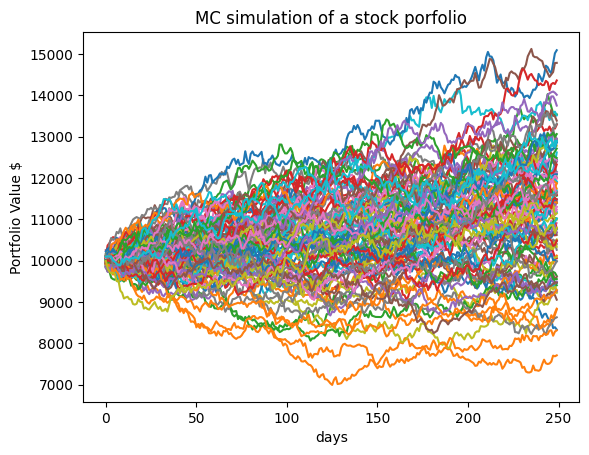

In [97]:
### Monte Carlo Method
nb_sims = 100
TimeFrame = 250

# Create a (TimeFrame,len(weights)) matrix with the meanReturns values, 100x6 here [[ABCDEF],[ABCDEF]...]
meanM = np.full(shape=(TimeFrame,len(weights)),fill_value=meanReturns) 
meanM = meanM.T # 6x100 [[AA...],[BB...],[CC...],[DD...],[EE...],[FF...]]

portfolio_sims = np.full(shape=(TimeFrame,nb_sims),fill_value=0.0)

initialPortfolio = 10000

for m in range(0,nb_sims):
    Z = np.random.normal(size=(TimeFrame,len(weights)))

    #decomposition de cholesky donne la matrice trianglulaire symétrique L tel que L.L^-1 = covMatrix
    L = np.linalg.cholesky(covMatrix)

    daily_returns = meanM + np.inner(L,Z)

    portfolio_sims[:,m] = np.cumprod(np.inner(weights,daily_returns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel("Portfolio Value $")
plt.xlabel("days")
plt.title('MC simulation of a stock porfolio')
plt.show()




In [103]:
np.mean(portfolio_sims[-1])

np.float64(11286.106790962329)

In [ ]:
plt.figure(figsize=(12, 3))
plt.hist(portfolio_sims[-1],color='blue', alpha=0.7, edgecolor='black',rwidth=0.7, label='Normal',density='True')
#plt.hist(list_final_prices_logNormal,color='green', alpha=0.7, edgecolor='black',rwidth=0.7, label='LogNormal Normalized',density=True)

plt.xlabel('Valeurs normalisées', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.title('Histogrammes des données normalisées', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()